# Feature Selection

O objetivo da seleção de recursos é duplo: queremos melhorar a eficiência computacional e reduzir o erro de generalização do modelo removendo recursos irrelevantes ou ruído. Esse tipo de abordagem é especialmente importante quando não estamos utilizando uma regularização forte.

## Benchmark

In [2]:
from sklearn.datasets import load_iris
from itertools import combinations

iris = load_iris()
X = iris.data
y = iris.target

In [7]:
X.shape,y.shape

((150, 4), (150,))

In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline


pipe = make_pipeline(StandardScaler(), 
                     KNeighborsClassifier())

pipe.fit(X, y)
pipe.score(X, y)


0.9533333333333334

### Exercicio -> Crie um Benchmark com o dataset de diabetes

## Feature Selection with GridSearch

In [5]:
all_comb = []
for size in range(1, 5):
    all_comb += list(combinations(range(X.shape[1]), r=size))
print(all_comb)

[(0,), (1,), (2,), (3,), (0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3), (0, 1, 2), (0, 1, 3), (0, 2, 3), (1, 2, 3), (0, 1, 2, 3)]


In [6]:
len(all_comb)

15

In [11]:
#!pip install mlxtend  

In [10]:
from mlxtend.feature_selection import ColumnSelector
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

pipe = make_pipeline(StandardScaler(),
                     ColumnSelector(),
                     KNeighborsClassifier())

param_grid = {'columnselector__cols': all_comb,
              'kneighborsclassifier__n_neighbors': list(range(1, 11))}

grid = GridSearchCV(pipe, param_grid, cv=5, n_jobs=-1)
grid.fit(X, y)
print('Best parameters:', grid.best_params_)
print('Best performance:', grid.best_score_)


C:\Users\marce\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


Best parameters: {'columnselector__cols': (2, 3), 'kneighborsclassifier__n_neighbors': 1}
Best performance: 0.98


### Exercicio -> Selecione 4 colunas do dataset de diabetes e faça o grid Search com analise combinatória.

In [32]:
import pandas as pd

df = pd.read_csv('diabetes.csv',encoding='latin-1',delimiter=',')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [33]:
df.shape

(768, 9)

In [34]:
import seaborn as sns

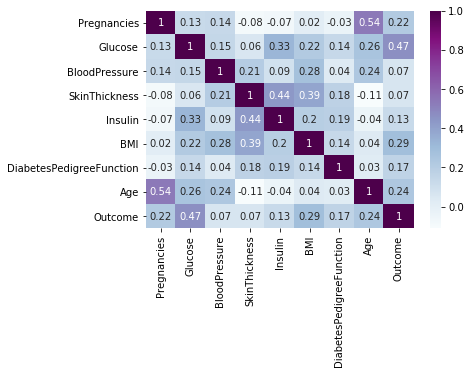

In [35]:
sns.heatmap(df.corr().round(2),annot=True,cmap='BuPu')

In [36]:
X = df.drop(columns=['Outcome'])
y = df['Outcome']

X.shape,y.shape

((768, 8), (768,))

In [37]:
all_comb = []
for size in range(1, 5):
    all_comb += list(combinations(range(X.shape[1]), r=size))
print(all_comb)

[(0,), (1,), (2,), (3,), (4,), (5,), (6,), (7,), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (3, 4), (3, 5), (3, 6), (3, 7), (4, 5), (4, 6), (4, 7), (5, 6), (5, 7), (6, 7), (0, 1, 2), (0, 1, 3), (0, 1, 4), (0, 1, 5), (0, 1, 6), (0, 1, 7), (0, 2, 3), (0, 2, 4), (0, 2, 5), (0, 2, 6), (0, 2, 7), (0, 3, 4), (0, 3, 5), (0, 3, 6), (0, 3, 7), (0, 4, 5), (0, 4, 6), (0, 4, 7), (0, 5, 6), (0, 5, 7), (0, 6, 7), (1, 2, 3), (1, 2, 4), (1, 2, 5), (1, 2, 6), (1, 2, 7), (1, 3, 4), (1, 3, 5), (1, 3, 6), (1, 3, 7), (1, 4, 5), (1, 4, 6), (1, 4, 7), (1, 5, 6), (1, 5, 7), (1, 6, 7), (2, 3, 4), (2, 3, 5), (2, 3, 6), (2, 3, 7), (2, 4, 5), (2, 4, 6), (2, 4, 7), (2, 5, 6), (2, 5, 7), (2, 6, 7), (3, 4, 5), (3, 4, 6), (3, 4, 7), (3, 5, 6), (3, 5, 7), (3, 6, 7), (4, 5, 6), (4, 5, 7), (4, 6, 7), (5, 6, 7), (0, 1, 2, 3), (0, 1, 2, 4), (0, 1, 2, 5), (0, 1, 2, 6), (0, 1, 2, 7), (0, 1, 3, 4), (0, 1, 3, 5), (0, 1, 3, 6),

In [38]:
from mlxtend.feature_selection import ColumnSelector
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

pipe = make_pipeline(StandardScaler(),
                     ColumnSelector(),
                     KNeighborsClassifier())

param_grid = {'columnselector__cols': all_comb,
              'kneighborsclassifier__n_neighbors': list(range(1, 11))}

grid = GridSearchCV(pipe, param_grid, cv=5, n_jobs=-1)
grid.fit(X, y)
print('Best parameters:', grid.best_params_)
print('Best performance:', grid.best_score_)


Best parameters: {'columnselector__cols': (1, 2, 5, 7), 'kneighborsclassifier__n_neighbors': 10}
Best performance: 0.7682291666666666


In [40]:
X.columns[1]

'Glucose'

## Scaling of a Subset of Features in a scikit-learn Pipeline

No exemplo abaixo temos um exemplo de como poderíamos usar o ColumnSelector juntamente com o FeatureUnion do scikit-learn para normalizar apenas parte das features  em conjuntos de dados com um Pipeline.


In [41]:
from mlxtend.feature_selection import ColumnSelector
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.data import iris_data


X, y = iris_data()

scale_pipe = make_pipeline(ColumnSelector(cols=(0, 1)), MinMaxScaler())

pipeline = Pipeline([
    ('feats', FeatureUnion([
        ('col_1-2', scale_pipe),
        ('col_3-4', ColumnSelector(cols=(2, 3)))
    ])),
    ('clf', KNeighborsClassifier())
])


pipeline.fit(X, y)

Pipeline(memory=None,
         steps=[('feats',
                 FeatureUnion(n_jobs=None,
                              transformer_list=[('col_1-2',
                                                 Pipeline(memory=None,
                                                          steps=[('columnselector',
                                                                  ColumnSelector(cols=(0,
                                                                                       1),
                                                                                 drop_axis=False)),
                                                                 ('minmaxscaler',
                                                                  MinMaxScaler(copy=True,
                                                                               feature_range=(0,
                                                                                              1)))],
                                           

### Exercicio -> Normalize 2 e não normalize outras duas colunas do exemplo anterior.

## Feature Selection exaustivo com GridSearch e mlxtend

Semelhante ao código com a combinação de todas as variáveis.

In [42]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS

iris = load_iris()
X = iris.data
y = iris.target

knn = KNeighborsClassifier(n_neighbors=3)

efs1 = EFS(knn, 
           min_features=1,
           max_features=4,
           scoring='accuracy',
           print_progress=True,
           cv=5)

efs1 = efs1.fit(X, y)

print('Best accuracy score: %.2f' % efs1.best_score_)
print('Best subset (indices):', efs1.best_idx_)
# print('Best subset (corresponding names):', efs1.best_feature_names_)

Features: 15/15

Best accuracy score: 0.97
Best subset (indices): (0, 2, 3)


In [43]:
# efs1.subsets_

## Visualizing the feature selection results

In [44]:
import pandas as pd

iris = load_iris()
X = iris.data
y = iris.target

knn = KNeighborsClassifier(n_neighbors=3)

efs1 = EFS(knn, 
           min_features=1,
           max_features=4,
           scoring='accuracy',
           print_progress=True,
           cv=5)

feature_names = ('sepal length', 'sepal width',
                 'petal length', 'petal width')
efs1 = efs1.fit(X, y, custom_feature_names=feature_names)

df = pd.DataFrame.from_dict(efs1.get_metric_dict()).T
df.sort_values('avg_score', inplace=True, ascending=False)

Features: 15/15

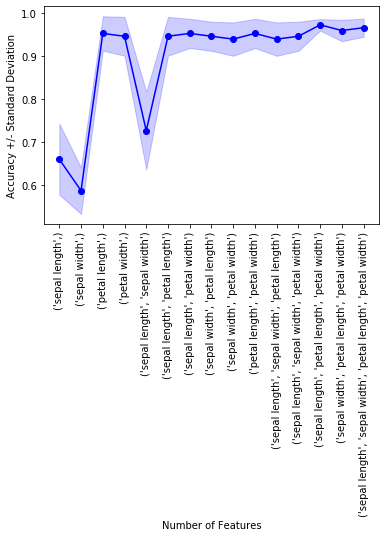

In [45]:
import matplotlib.pyplot as plt
%matplotlib inline

metric_dict = efs1.get_metric_dict()

fig = plt.figure()
k_feat = sorted(metric_dict.keys())
avg = [metric_dict[k]['avg_score'] for k in k_feat]

upper, lower = [], []
for k in k_feat:
    upper.append(metric_dict[k]['avg_score'] +
                 metric_dict[k]['std_dev'])
    lower.append(metric_dict[k]['avg_score'] -
                 metric_dict[k]['std_dev'])

plt.fill_between(k_feat,
                 upper,
                 lower,
                 alpha=0.2,
                 color='blue',
                 lw=1)

plt.plot(k_feat, avg, color='blue', marker='o')
plt.ylabel('Accuracy +/- Standard Deviation')
plt.xlabel('Number of Features')
feature_min = len(metric_dict[k_feat[0]]['feature_idx'])
feature_max = len(metric_dict[k_feat[-1]]['feature_idx'])
plt.xticks(k_feat, 
           [str(metric_dict[k]['feature_names']) for k in k_feat], 
           rotation=90)

plt.show()

### Plot o feature importance da analise combinatória do dataset de diabetes

In [ ]:
# para um modelo, mais variáveis não necessariamente é bom pois reduz a complexidade do modelo e reduz com sobreposição de efeitos

## Exhaustive Feature Selection for Regression

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston

boston = load_boston()
X, y = boston.data, boston.target

lr = LinearRegression()

efs = EFS(lr, 
          min_features=10,
          max_features=12,
          scoring='neg_mean_squared_error',
          cv=10)

efs.fit(X, y)

print('Best MSE score: %.2f' % efs.best_score_ * (-1))
print('Best subset:', efs.best_idx_)

Features: 377/377


Best subset: (0, 1, 4, 6, 7, 8, 9, 10, 11, 12)


## Using the Selected Feature Subset For Making New Predictions

(utilizando o .transform para aplicar as mesmas regras do treinamento)

In [47]:
# Initialize the dataset

from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(
         X, y, test_size=0.33, random_state=1)

knn = KNeighborsClassifier(n_neighbors=3)

In [48]:
# Select the "best" three features via
# 5-fold cross-validation on the training set.

from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS

efs1 = EFS(knn, 
           min_features=1,
           max_features=4,
           scoring='accuracy',
           cv=5)

efs1 = efs1.fit(X_train, y_train)

Features: 15/15

In [49]:
print('Selected features:', efs1.best_idx_)

Selected features: (2, 3)


In [50]:
# Generate the new subsets based on the selected features
# Note that the transform call is equivalent to
# X_train[:, efs1.k_feature_idx_]

X_train_efs = efs1.transform(X_train)
X_test_efs = efs1.transform(X_test)

# Fit the estimator using the new feature subset
# and make a prediction on the test data
knn.fit(X_train_efs, y_train)
y_pred = knn.predict(X_test_efs)

# Compute the accuracy of the prediction
acc = float((y_test == y_pred).sum()) / y_pred.shape[0]
print('Test set accuracy: %.2f %%' % (acc*100))

Test set accuracy: 96.00 %


### Separe os dados de diabates em treino e teste e utilize o .transform do pipeline para aplicar as transformações

## A simple Sequential Forward Selection example

Ao invés de fazermos uma busca exaustiva, que em nossos exemplos são dados pequenos que rodam rapido, no mundo real essa aula demoraria muitas horas esperando os algoritmos rodarem testando todas as possibilidades. Para rodar esses algoritmos no mundo real, precisamos de uma estratégia mais inteligente para escolher variáveis do que testar todas as combinações possíveis. Para isso temos duas grandes abordagens, forward (adicionando variáveis) e backward (removendo).



In [51]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target
knn = KNeighborsClassifier(n_neighbors=4)

In [52]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

sfs1 = SFS(knn, 
           k_features=3, 
           forward=True, 
           verbose=2,
           scoring='accuracy',
           cv=0,
           n_jobs=-1)

sfs1 = sfs1.fit(X, y)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    1.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    1.7s finished

[2019-07-05 11:32:42] Features: 1/3 -- score: 0.96[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    1.2s finished

[2019-07-05 11:32:44] Features: 2/3 -- score: 0.9733333333333334[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.9s finished

[2019-07-05 11:32:45] Features: 3/3 -- score: 0.9733333333333334

## Sequential Feature Selection for Regression

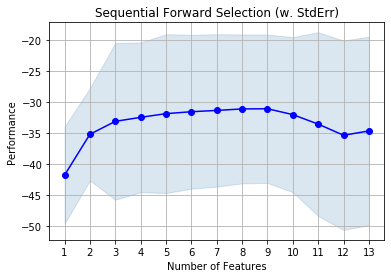

In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

boston = load_boston()
X, y = boston.data, boston.target

lr = LinearRegression()

sfs = SFS(lr, 
          k_features=13, 
          forward=True, 
          scoring='neg_mean_squared_error',
          cv=10)

sfs = sfs.fit(X, y)
fig = plot_sfs(sfs.get_metric_dict(), kind='std_err')

plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

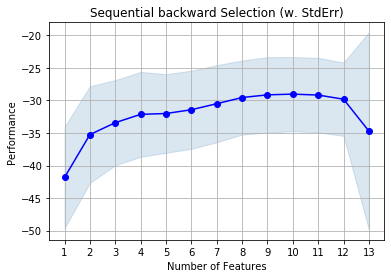

In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

boston = load_boston()
X, y = boston.data, boston.target

lr = LinearRegression()

sfs = SFS(lr, 
          k_features=1, 
          forward=False, 
          scoring='neg_mean_squared_error',
          cv=10)

sfs = sfs.fit(X, y)
fig = plot_sfs(sfs.get_metric_dict(), kind='std_err')

plt.title('Sequential backward Selection (w. StdErr)')
plt.grid()
plt.show()

## Selecting the "best" feature combination in a k-range

Se k_features for definido como para uma tupla (min_k, max_k), o SFS agora selecionará a melhor combinação de recursos que descobriu ao iterar de k = 1 até max_k  (forward) ou max_k a min_k (backward). O tamanho do subconjunto de recursos retornados é, então, dentro de max_k para min_k, dependendo de qual combinação tenha marcado melhor durante a validação cruzada.

best combination (ACC: 0.992): (0, 1, 2, 3, 6, 8, 9, 10, 11, 12)

all subsets:
 {1: {'feature_idx': (6,), 'cv_scores': array([0.84615385, 0.6       , 0.88      , 0.79166667, 0.875     ]), 'avg_score': 0.7985641025641026, 'feature_names': ('6',)}, 2: {'feature_idx': (6, 9), 'cv_scores': array([0.92307692, 0.88      , 1.        , 0.95833333, 0.91666667]), 'avg_score': 0.9356153846153846, 'feature_names': ('6', '9')}, 3: {'feature_idx': (6, 9, 12), 'cv_scores': array([0.92307692, 0.92      , 0.96      , 1.        , 0.95833333]), 'avg_score': 0.9522820512820512, 'feature_names': ('6', '9', '12')}, 4: {'feature_idx': (3, 6, 9, 12), 'cv_scores': array([0.96153846, 0.96      , 0.96      , 1.        , 0.95833333]), 'avg_score': 0.9679743589743589, 'feature_names': ('3', '6', '9', '12')}, 5: {'feature_idx': (3, 6, 9, 10, 12), 'cv_scores': array([0.92307692, 0.96      , 1.        , 1.        , 1.        ]), 'avg_score': 0.9766153846153847, 'feature_names': ('3', '6', '9', '10', '12')}, 6: {'feat

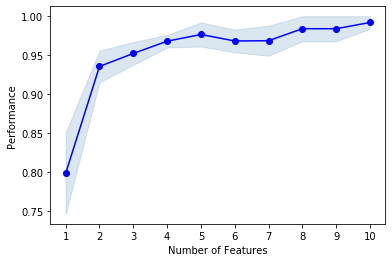

In [55]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.data import wine_data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

X, y = wine_data()

X_train, X_test, y_train, y_test= train_test_split(X, y, 
                                                   stratify=y,
                                                   test_size=0.3,
                                                   random_state=1)

knn = KNeighborsClassifier(n_neighbors=2)

sfs1 = SFS(estimator=knn, 
           k_features=(3, 10),
           forward=True, 
           scoring='accuracy',
           cv=5)

pipe = make_pipeline(StandardScaler(), sfs1)

pipe.fit(X_train, y_train)

print('best combination (ACC: %.3f): %s\n' % (sfs1.k_score_, sfs1.k_feature_idx_))
print('all subsets:\n', sfs1.subsets_)
plot_sfs(sfs1.get_metric_dict(), kind='std_err');